In [2]:
library(readxl)

In [3]:
df = read_excel('mult_regr.xlsx')

In [4]:
mod1 = lm(HeatFlux ~ ., data = df)

In [5]:
summary(mod1)


Call:
lm(formula = HeatFlux ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9748  -3.9549  -0.0943   3.8171  20.5014 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 389.1659    66.0937   5.888 3.83e-06 ***
East          2.1247     1.2145   1.750   0.0925 .  
South         5.3185     0.9629   5.523 9.69e-06 ***
North       -24.1324     1.8685 -12.915 1.46e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.598 on 25 degrees of freedom
Multiple R-squared:  0.8741,	Adjusted R-squared:  0.859 
F-statistic: 57.87 on 3 and 25 DF,  p-value: 2.167e-11


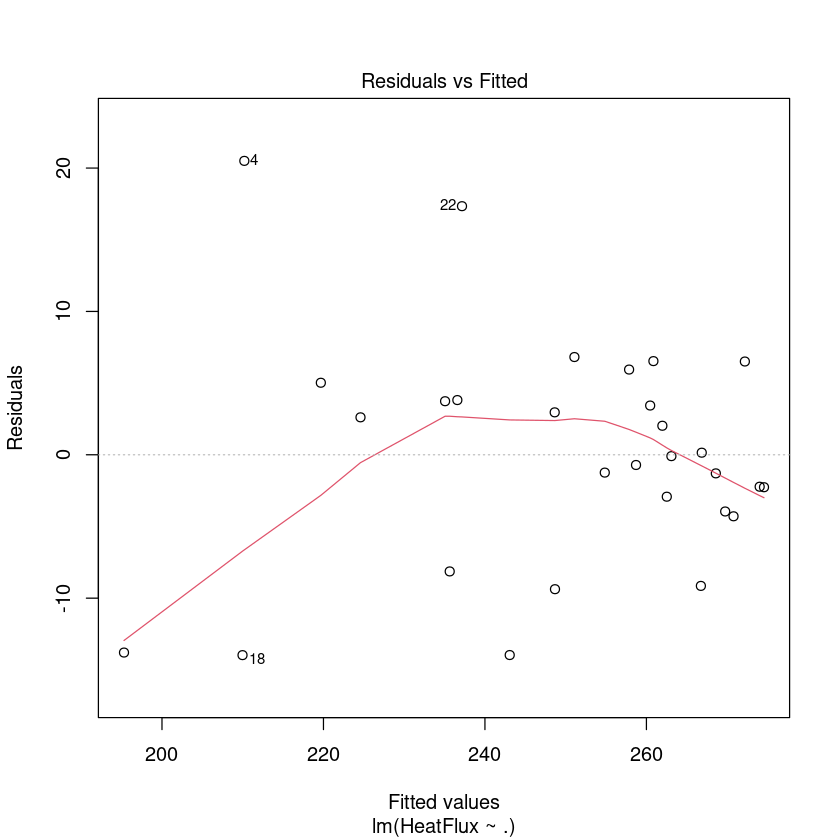

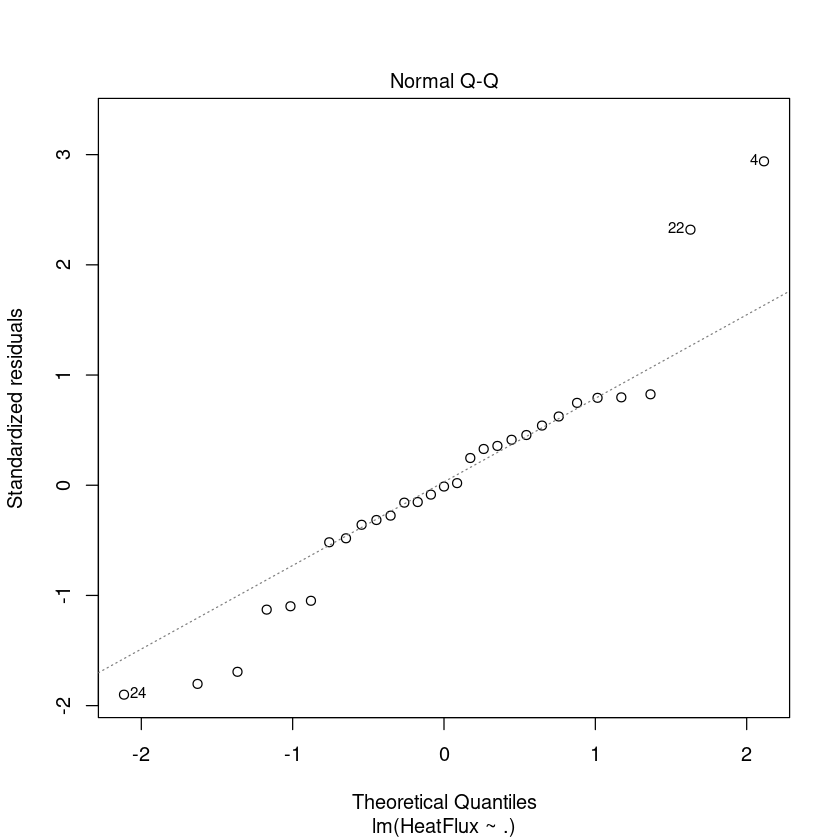

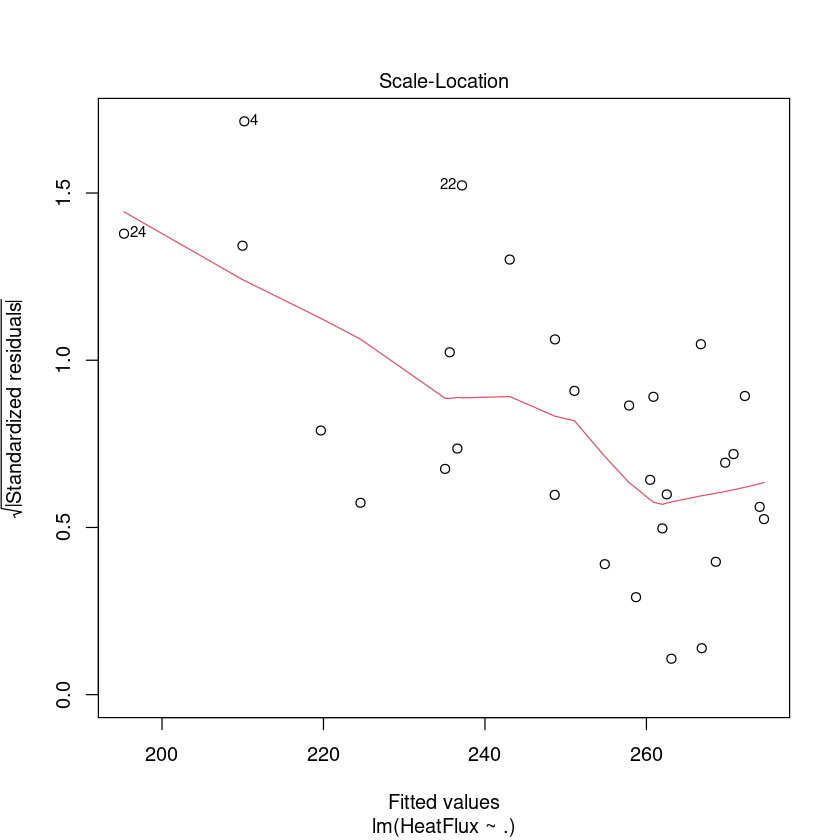

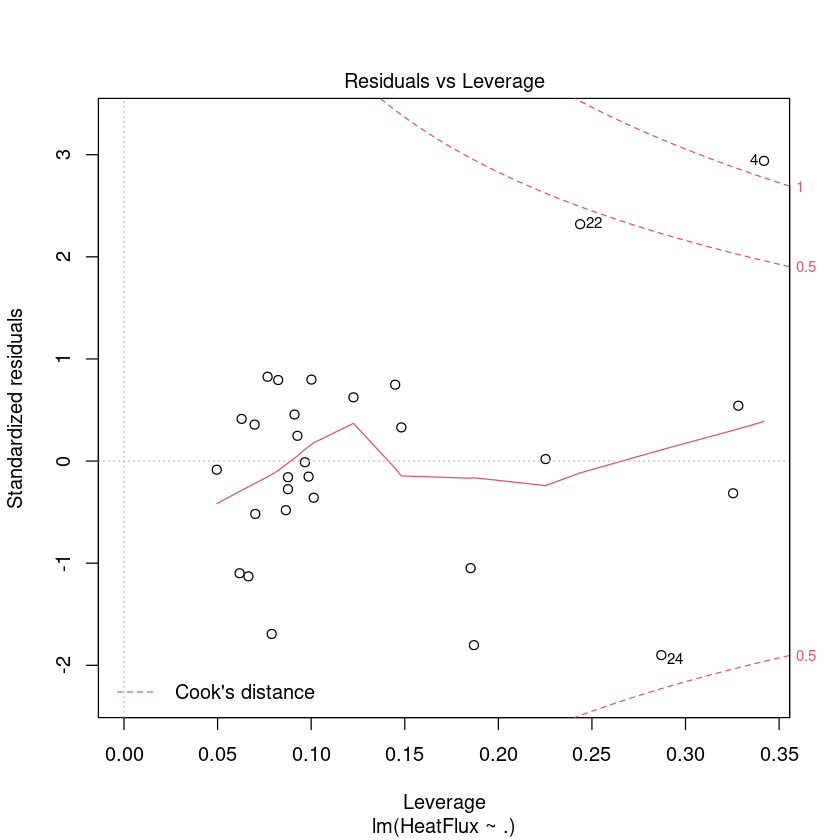

In [6]:
plot(mod1)

# Multicollinearity

In [7]:
df = read_excel('WageData.xlsx')

In [8]:
head(df)

Edu,Locn,Gender,Exp,Union,Age,Race,Occp,Sector,Marr,Wage
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,0,1,21,0,35,2,6,1,1,5.10
9,0,1,42,0,57,3,6,1,1,4.95
12,0,0,1,0,19,3,6,1,0,6.67
12,0,0,4,0,22,3,6,0,0,4.00
12,0,0,17,0,35,3,6,0,1,7.50
13,0,0,9,1,28,3,6,0,0,13.07


In [9]:
mod2 = lm(Wage ~ ., data = df)

In [10]:
summary(mod2)


Call:
lm(formula = Wage ~ ., data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-9.190 -2.616 -0.684  1.873 37.301 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.0402     6.8790  -0.297  0.76690    
Edu           1.3262     1.1082   1.197  0.23194    
Locn         -0.6975     0.4285  -1.628  0.10414    
Gender       -2.1443     0.3993  -5.370 1.19e-07 ***
Exp           0.5246     1.1086   0.473  0.63625    
Union         1.5168     0.5250   2.889  0.00403 ** 
Age          -0.4282     1.1079  -0.386  0.69931    
Race          0.4786     0.2855   1.676  0.09426 .  
Occp         -0.1527     0.1312  -1.165  0.24475    
Sector        0.7190     0.3876   1.855  0.06414 .  
Marr          0.4252     0.4195   1.013  0.31131    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.401 on 523 degrees of freedom
Multiple R-squared:  0.2805,	Adjusted R-squared:  0.2667 
F-statistic: 20.39 on 10 and 523 DF,  p-v

In [11]:
library(car)

Loading required package: carData



vif is the abbreviation for Variane Inflation Factor, which is used to check multi-collinearity
- When vif value > 5 then multicollinearity exists
- We keep removing the data which has the highest vif value until all data have a vif value < 5

In [12]:
vif(mod2)

Edu        Locn      Gender         Exp       Union         Age 
 231.195580    1.046828    1.091634 5184.093895    1.120861 4645.664977 
       Race        Occp      Sector        Marr 
   1.037138    1.298232    1.198670    1.096130

In [13]:
cor(df$Exp , df$Age)

[1] 0.9779612

In [14]:
mod3 = lm(Wage ~. -Exp, data = df)

In [16]:
vif(mod3)

Edu     Locn   Gender    Union      Age     Race     Occp   Sector 
1.125994 1.046306 1.088334 1.120743 1.154496 1.037015 1.295935 1.198460 
    Marr 
1.094289

In [17]:
summary(mod3)


Call:
lm(formula = Wage ~ . - Exp, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-9.178 -2.624 -0.679  1.884 37.284 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.20060    1.64803  -3.156  0.00169 ** 
Edu          0.80309    0.07728  10.392  < 2e-16 ***
Locn        -0.70205    0.42804  -1.640  0.10158    
Gender      -2.13391    0.39840  -5.356 1.27e-07 ***
Union        1.51428    0.52462   2.886  0.00406 ** 
Age          0.09606    0.01745   5.504 5.82e-08 ***
Race         0.48003    0.28524   1.683  0.09299 .  
Occp        -0.15013    0.13095  -1.146  0.25213    
Sector       0.71656    0.38725   1.850  0.06482 .  
Marr         0.41705    0.41888   0.996  0.31989    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.397 on 524 degrees of freedom
Multiple R-squared:  0.2802,	Adjusted R-squared:  0.2678 
F-statistic: 22.66 on 9 and 524 DF,  p-value: < 2.2e-16


In [1]:
library(MASS)

In [2]:
head(stackloss)

,Air.Flow,Water.Temp,Acid.Conc.,stack.loss
,<dbl>,<dbl>,<dbl>,<dbl>
1,80,27,89,42
2,80,27,88,37
3,75,25,90,37
4,62,24,87,28
5,62,22,87,18
6,62,23,87,18


In [3]:
mod3 = lm(stack.loss~.,data = stackloss)

In [4]:
summary(mod3)


Call:
lm(formula = stack.loss ~ ., data = stackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2377 -1.7117 -0.4551  2.3614  5.6978 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -39.9197    11.8960  -3.356  0.00375 ** 
Air.Flow      0.7156     0.1349   5.307  5.8e-05 ***
Water.Temp    1.2953     0.3680   3.520  0.00263 ** 
Acid.Conc.   -0.1521     0.1563  -0.973  0.34405    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.243 on 17 degrees of freedom
Multiple R-squared:  0.9136,	Adjusted R-squared:  0.8983 
F-statistic:  59.9 on 3 and 17 DF,  p-value: 3.016e-09


14/7/21

In [1]:
df = read.csv('Salary.csv')

In [2]:
head(df)

,Exp,Salary
,<dbl>,<int>
1,1.1,39343
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.9,56642


In [3]:
erupt = faithful$eruptions

In [4]:
mean(erupt)

[1] 3.487783

In [5]:
sd(erupt)

[1] 1.141371

In [6]:
erupt_norm = (erupt - mean(erupt)) / sd(erupt)

In [8]:
head(erupt_norm)

[1]  0.09831763 -1.47873278 -0.13561152 -1.05555759  0.91575542 -0.52987412

In [9]:
mean(erupt_norm)

[1] 8.972251e-17

In [10]:
sd(erupt_norm)

[1] 1

In [11]:
erupt_norm2 = scale(erupt)

In [12]:
head(erupt_norm2)

0.09831763
-1.47873278
-0.13561152
-1.05555759
0.91575542
-0.52987412


In [19]:
norm_df = as.data.frame(scale(df))

In [20]:
head(norm_df)

,Exp,Salary
,<dbl>,<dbl>
1,-1.4393847,-1.386782
2,-1.3841149,-1.173429
3,-1.3288450,-1.436902
4,-1.1906704,-1.256755
5,-1.1354005,-1.369743
6,-0.9419561,-0.848922


In [22]:
mean(norm_df$Exp)

[1] -5.404283e-17

In [24]:
sd(norm_df$Salary)

[1] 1

In [25]:
sd(norm_df$Exp)

[1] 1

In [26]:
min(norm_df$Salary)

[1] -1.436902

In [27]:
min(norm_df$Exp)

[1] -1.439385

We'll have to unnormalize the normalized value for prediction

## Robust scalar technique

In [32]:
robust_scale = function(x){
    (x - median(x))/(quantile(x,0.75) - quantile(x,0.25))
}

In [33]:
robust_df = as.data.frame(lapply(df,robust_scale))

In [34]:
head(robust_df)

,Exp,Salary
,<dbl>,<dbl>
1,-0.7241379,-0.7476270
2,-0.6896552,-0.6255371
3,-0.6551724,-0.7763079
4,-0.5689655,-0.6732201
5,-0.5344828,-0.7378769
6,-0.4137931,-0.4398402


### If the distribution is skewed (data is not symmetric) then median should be used

## Min Max normalization

In [35]:
minmax_scale = function(x){
    (x - min(x)) / (max(x) - min(x))
}

In [36]:
minmax_df = as.data.frame(lapply(df,minmax_scale))

In [37]:
head(minmax_df)

,Exp,Salary
,<dbl>,<dbl>
1,0.00000000,0.01584524
2,0.01612903,0.08329565
3,0.03225806,0.00000000
4,0.07258065,0.05695244
5,0.08870968,0.02123184
6,0.14516129,0.18588672


## Normal MinMax / Mean Normailzation

In [38]:
norm_minmax_scale = function(x){
    (x - mean(x)) / (max(x) - min(x))
}

In [39]:
norm_minmax_df = as.data.frame(lapply(df,norm_minmax_scale))

In [40]:
head(norm_minmax_df)

,Exp,Salary
,<dbl>,<dbl>
1,-0.4200461,-0.4384237
2,-0.4039171,-0.3709733
3,-0.3877880,-0.4542690
4,-0.3474654,-0.3973165
5,-0.3313364,-0.4330371
6,-0.2748848,-0.2683823


In [42]:
mean(norm_minmax_df$Exp)

[1] -1.064996e-17

In [43]:
mean(norm_minmax_df$Salary)

[1] -5.349763e-17

In [44]:
library(ggplot2)

In [54]:
a = ggplot() + geom_point(df,mapping=aes(Exp,Salary),color = 'darkgreen')

In [55]:
b = ggplot() + geom_point(norm_minmax_df,mapping=aes(Exp,Salary),color = 'darkblue')

In [56]:
c = ggplot() + geom_point(robust_df,mapping=aes(Exp,Salary),color = 'green')

In [57]:
d = ggplot() + geom_point(minmax_df,mapping=aes(Exp,Salary),color = 'blue')

In [66]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

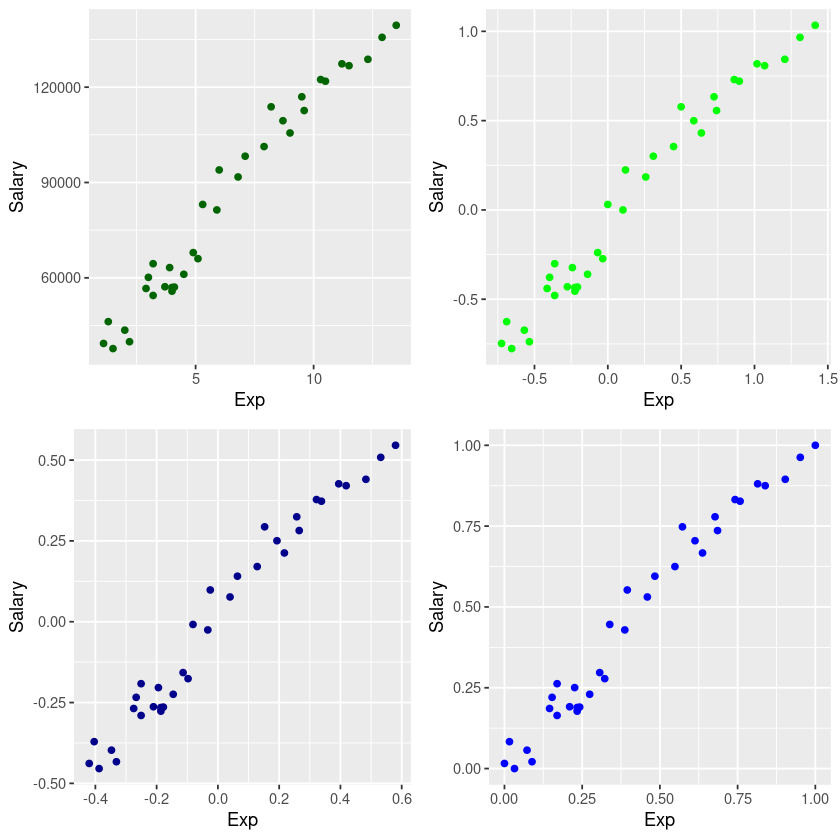

In [67]:
multiplot(a,b,c,d,cols = 2)

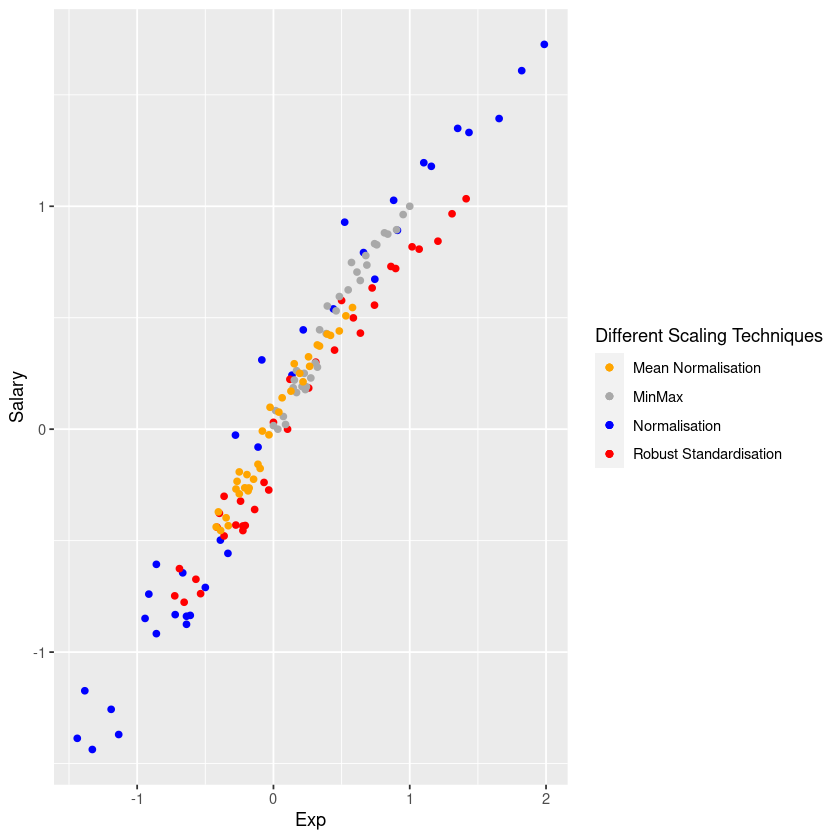

In [68]:
ggplot() + geom_point(norm_df, mapping = aes(x=Exp, y=Salary, color="Normalisation"))+geom_point(robust_df, mapping = aes(x=Exp, y=Salary, color="Robust Standardisation")) +geom_point(minmax_df, mapping = aes(x=Exp, y=Salary, color="MinMax"))+ geom_point(norm_minmax_df, mapping = aes(x=Exp, y=Salary, color="Mean Normalisation")) + scale_color_manual(name = "Different Scaling Techniques",values = c( "Normalisation" = "blue", "Robust Standardisation" = "red", "MinMax" = "darkgrey", "Mean Normalisation" = "orange")) 

# 19/7

In [4]:
library(car)

Loading required package: carData



In [5]:
data('Salaries')

In [6]:
head(Salaries)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
,<fct>,<fct>,<int>,<int>,<fct>,<int>
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500
6,AssocProf,B,6,6,Male,97000


In [7]:
str(Salaries)

'data.frame':	397 obs. of  6 variables:
 $ rank         : Factor w/ 3 levels "AsstProf","AssocProf",..: 3 3 1 3 3 2 3 3 3 3 ...
 $ discipline   : Factor w/ 2 levels "A","B": 2 2 2 2 2 2 2 2 2 2 ...
 $ yrs.since.phd: int  19 20 4 45 40 6 30 45 21 18 ...
 $ yrs.service  : int  18 16 3 39 41 6 23 45 20 18 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 1 ...
 $ salary       : int  139750 173200 79750 115000 141500 97000 175000 147765 119250 129000 ...


In [8]:
mod1 = lm(salary ~ sex, data = Salaries) # reference event is Female

In [9]:
summary(mod1)


Call:
lm(formula = salary ~ sex, data = Salaries)

Residuals:
   Min     1Q Median     3Q    Max 
-57290 -23502  -6828  19710 116455 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   101002       4809  21.001  < 2e-16 ***
sexMale        14088       5065   2.782  0.00567 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 30030 on 395 degrees of freedom
Multiple R-squared:  0.01921,	Adjusted R-squared:  0.01673 
F-statistic: 7.738 on 1 and 395 DF,  p-value: 0.005667


### changing reference event to male

In [10]:
Salaries$sex = relevel(Salaries$sex, ref = 'Male')

In [11]:
mod2 = lm(salary ~ sex, data = Salaries)

In [12]:
summary(mod2)


Call:
lm(formula = salary ~ sex, data = Salaries)

Residuals:
   Min     1Q Median     3Q    Max 
-57290 -23502  -6828  19710 116455 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   115090       1587  72.503  < 2e-16 ***
sexFemale     -14088       5065  -2.782  0.00567 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 30030 on 395 degrees of freedom
Multiple R-squared:  0.01921,	Adjusted R-squared:  0.01673 
F-statistic: 7.738 on 1 and 395 DF,  p-value: 0.005667


In [13]:
levels(Salaries$rank)

[1] "AsstProf"  "AssocProf" "Prof"

### Dummy variables to be added are (n-1)
- Assistant Professor is already the reference so no dummy variable will be given
- If someone's an associate professor they'll be assigned 1 0
- If someone's a professor they'll be assigned 0 1

In [15]:
res = model.matrix(~rank, data = Salaries)

In [16]:
head(res)

,(Intercept),rankAssocProf,rankProf
1,1,0,1
2,1,0,1
3,1,0,0
4,1,0,1
5,1,0,1
6,1,1,0


- As assistant professor is the reference it is removed from `res`
- 1st is professor hence given 0 1
- 3rd is assistant professor hence given 0 0
- 6th is associate professor hence given 1 0

In [17]:
head(Salaries$rank)

[1] Prof      Prof      AsstProf  Prof      Prof      AssocProf
Levels: AsstProf AssocProf Prof

In [18]:
mod3 = lm(salary ~ ., data = Salaries)

In [19]:
Anova(mod3)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
rank,69507674502,2,68.414332,3.404601e-26
discipline,19237331473,1,37.869464,1.878412e-09
yrs.since.phd,2504060819,1,4.929345,2.697855e-02
yrs.service,2710023485,1,5.334791,2.142543e-02
sex,780676354,1,1.536793,2.158412e-01
Residuals,198116333525,390,NA,NA


## Null hypothesis
- There is no difference in means of different ranks / Rank does not influence the salary
- Discipline does not influence the salary
- Years since PHD does not influence the salary
- Sex of the person does not influence the salary